<a href="https://colab.research.google.com/github/hogan-tech/AAI-595-Final/blob/main/ML_Project_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
!pip install kaggle

In [ ]:
!pip install --upgrade holidays

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import holidays
import os

#Import Hourly Energy Consumption Dataset

The hourly energy consumption datasets consist of energy (megawatt units) of different power companies in the US.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("robikscube/hourly-energy-consumption")

print("Path to dataset files:", path)

100%|██████████| 11.4M/11.4M [00:00<00:00, 59.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/robikscube/hourly-energy-consumption/versions/3


# Import holiday dataset
We want to use external US holiday dataset to see if we can find a pattern of energy consumption around holiday days

In [ ]:
path_holiday = kagglehub.dataset_download("donnetew/us-holiday-dates-2004-2021")

100%|██████████| 2.45k/2.45k [00:00<00:00, 4.22MB/s]

Extracting files...


In [ ]:
print("Path to holiday dataset:", path_holiday)


Path to holiday dataset: /root/.cache/kagglehub/datasets/donnetew/us-holiday-dates-2004-2021/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/robikscube/hourly-energy-consumption/versions/3


AEP_hourly.csv	   DEOK_hourly.csv  EKPC_hourly.csv	NI_hourly.csv	    PJM_Load_hourly.csv
COMED_hourly.csv   DOM_hourly.csv   est_hourly.paruqet	PJME_hourly.csv     PJMW_hourly.csv
DAYTON_hourly.csv  DUQ_hourly.csv   FE_hourly.csv	pjm_hourly_est.csv


# Data Exploration and Analysis


## Merging the energy consumption datasets
By Yian

In [ ]:
aep = pd.read_csv(os.path.join(path, "AEP_hourly.csv"))
comed = pd.read_csv(os.path.join(path, "COMED_hourly.csv"))
dayton = pd.read_csv(os.path.join(path, "DAYTON_hourly.csv"))
deok = pd.read_csv(os.path.join(path, "DEOK_hourly.csv"))
dom = pd.read_csv(os.path.join(path, "DOM_hourly.csv"))
duq = pd.read_csv(os.path.join(path, "DUQ_hourly.csv"))
ekpc = pd.read_csv(os.path.join(path, "EKPC_hourly.csv"))
fe = pd.read_csv(os.path.join(path, "FE_hourly.csv"))
ni = pd.read_csv(os.path.join(path, "NI_hourly.csv"))
pjme = pd.read_csv(os.path.join(path, "PJME_hourly.csv"))
pjm = pd.read_csv(os.path.join(path, "pjm_hourly_est.csv")) # diff format
pjm_load = pd.read_csv(os.path.join(path, "PJM_Load_hourly.csv"))
pjmw = pd.read_csv(os.path.join(path, "PJMW_hourly.csv"))

In [ ]:
aep["company"] = "AEP_MW"
comed["company"] = "COMED_MW"
dayton["company"] = "DAYTON_MW"
deok["company"] = "DEOK_MW"
dom["company"] = "DOM_MW"
duq["company"] = "DUQ_MW"
ekpc["company"] = "EKPC_MW"
fe["company"] = "FE_MW"
ni["company"] = "NI_MW"
pjme["company"] = "PJME_MW"
pjmw["company"] = "PJMW_MW"
pjm_load["company"] = "PJM_Load_MW"

In [ ]:
aep = aep.rename(columns={"AEP_MW": "MW"})
comed = comed.rename(columns={"COMED_MW": "MW"})
dayton = dayton.rename(columns={"DAYTON_MW": "MW"})
deok = deok.rename(columns={"DEOK_MW": "MW"})
dom = dom.rename(columns={"DOM_MW": "MW"})
duq = duq.rename(columns={"DUQ_MW": "MW"})
ekpc = ekpc.rename(columns={"EKPC_MW": "MW"})
fe = fe.rename(columns={"FE_MW": "MW"})
ni = ni.rename(columns={"NI_MW": "MW"})
pjme = pjme.rename(columns={"PJME_MW": "MW"})
pjmw = pjmw.rename(columns={"PJMW_MW": "MW"})
pjm_load = pjm_load.rename(columns={"PJM_Load_MW": "MW"})

In [ ]:
df_combined = pd.concat([aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjme, pjmw, pjm_load], ignore_index=True)
df_combined.head()

,Datetime,MW,company
0,2004-12-31 01:00:00,13478.0,AEP_MW
1,2004-12-31 02:00:00,12865.0,AEP_MW
2,2004-12-31 03:00:00,12577.0,AEP_MW
3,2004-12-31 04:00:00,12517.0,AEP_MW
4,2004-12-31 05:00:00,12670.0,AEP_MW


In [ ]:
df_combined.shape

(1090167, 3)

In [ ]:
df = df_combined.copy()

In [ ]:
df.columns

Index(['Datetime', 'MW', 'company'], dtype='object')

## Check dataset type and statistical breakdown
By Yian

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090167 entries, 0 to 1090166
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Datetime  1090167 non-null  object 
 1   MW        1090167 non-null  float64
 2   company   1090167 non-null  object 
dtypes: float64(1), object(2)
memory usage: 25.0+ MB


In [ ]:
df.describe()

,MW
count,1.090167e+06
mean,1.120959e+04
std,1.053440e+04
min,0.000000e+00
25%,2.455000e+03
50%,8.217000e+03
75%,1.466500e+04
max,6.200900e+04


## Check if there are null values

In [ ]:
# no null values in dataset
df.isna().sum()

,0
Datetime,0
MW,0
company,0


## Separate categorical from numerical attributes for data visualization
By Yian

In [ ]:
numerical_attributes = df.select_dtypes( include=['float64'] )
numerical_attributes.head()

,MW
0,13478.0
1,12865.0
2,12577.0
3,12517.0
4,12670.0


In [ ]:
categorical_attributes = df["company"]
categorical_attributes.head()

,company
0,AEP_MW
1,AEP_MW
2,AEP_MW
3,AEP_MW
4,AEP_MW


## Data Analysis
By Yian
<br>
Get the central tendency mean and median of the energy consumption dataset to check the typical data point. Check standard deviation, skewness and kurtosis of the dataset

In [ ]:
num_att_mean = pd.DataFrame(numerical_attributes.apply(np.mean)).T
num_att_median = pd.DataFrame(numerical_attributes.apply(np.median)).T
d1 = pd.DataFrame(numerical_attributes.apply(np.std)).T # standard deviation
d2 = pd.DataFrame(numerical_attributes.apply(min)).T
d3 = pd.DataFrame(numerical_attributes.apply(max)).T
d4 = pd.DataFrame(numerical_attributes.apply(lambda x: x.max() - x.min())).T # range
d5 = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew())).T # skewness
d6 = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis())).T # kurtosis


In [ ]:
stats_df = pd.concat([d1,d2,d3,d4,d5,d6,num_att_mean,num_att_median]).T

In [ ]:
# rename columns
stats_df.columns = ["std", "min", "max", "range", "skew", "kurtosis", "mean", "median"]

In [ ]:
stats_df

,std,min,max,range,skew,kurtosis,mean,median
MW,10534.394704,0.0,62009.0,62009.0,1.356423,1.198281,11209.58865,8217.0


## Check the distribution of the data
By Yian

<Axes: xlabel='MW', ylabel='Count'>

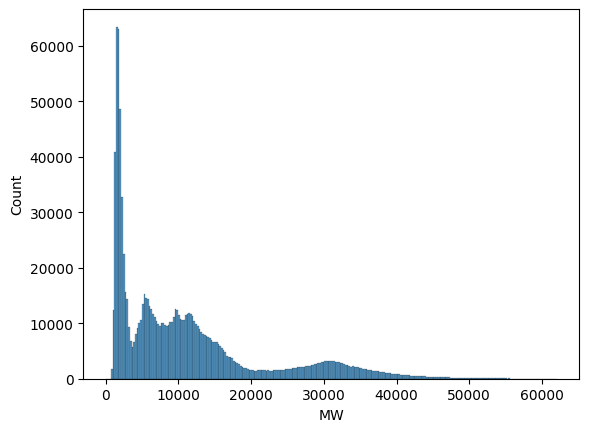

In [ ]:
import seaborn as sns
sns.histplot( df['MW'] )


## Data Analysis
By Yian
<br>
<br>
From the histogram we can see the distribution of the data, which shows a right-skewed distribution. The high standard deviation (10534.39) also indicates a large spread and variability in the energy consumption values.  Most of the data points are concentrated in the lower range, with a long tail extending to the right. The right tail indicates some extreme outliers, where energy consumption is high in some cases on certain dates, pulling the distribution to the right. We shall analysis what are the causes of these outliers and apply normalization technique to help our predictive modeling. Beause our data has a high range and standard deviation, it is better to normalize the data first so our model can converge more efficiently when learning the patterns of the training data. The mean of the dataset is 11209.25, which is higher than the median (8217.00), which is also typical in right-skewed distribution in this case.

In [ ]:
df

,Datetime,MW,company
0,2004-12-31 01:00:00,13478.0,AEP_MW
1,2004-12-31 02:00:00,12865.0,AEP_MW
2,2004-12-31 03:00:00,12577.0,AEP_MW
3,2004-12-31 04:00:00,12517.0,AEP_MW
4,2004-12-31 05:00:00,12670.0,AEP_MW
...,...,...,...
1090162,2001-01-01 20:00:00,35209.0,PJM_Load_MW
1090163,2001-01-01 21:00:00,34791.0,PJM_Load_MW
1090164,2001-01-01 22:00:00,33669.0,PJM_Load_MW
1090165,2001-01-01 23:00:00,31809.0,PJM_Load_MW


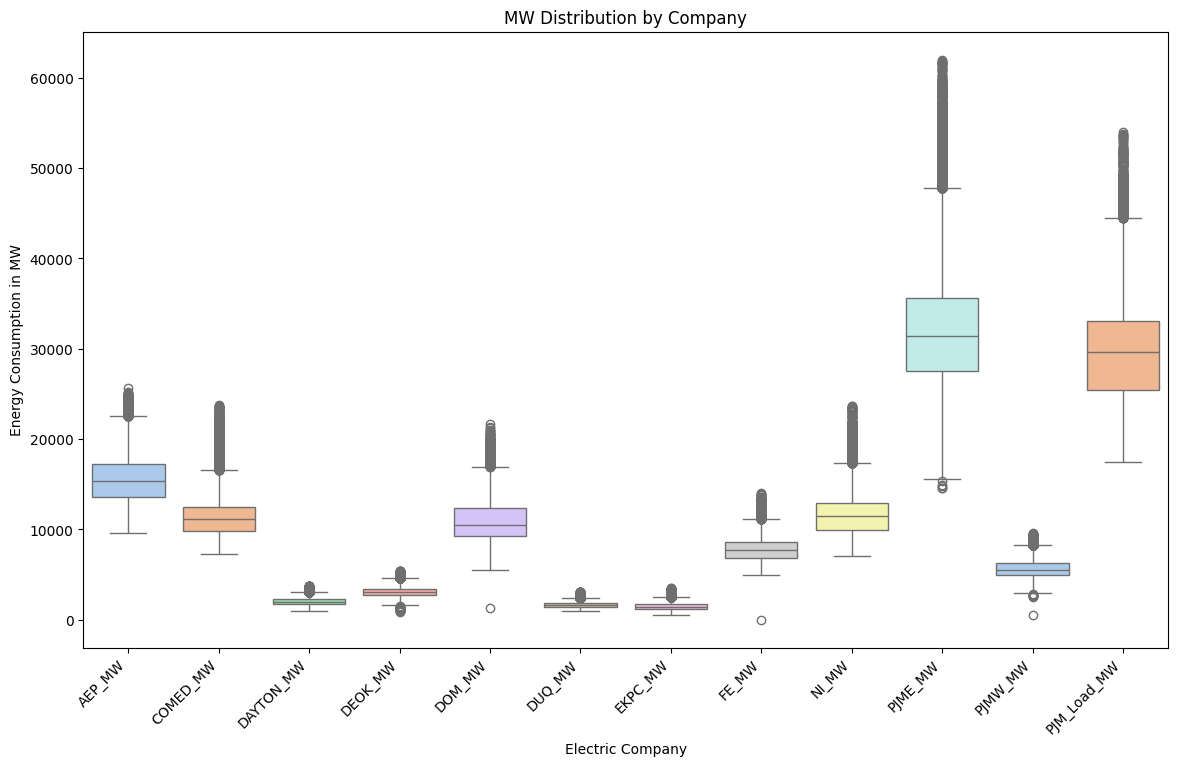

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot( x="company", y="MW", data=df, palette="pastel", hue="company")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("MW Distribution by Company")
plt.xlabel("Electric Company")
plt.ylabel("Energy Consumption in MW")
plt.show()

## Check if US holidays have any correlation or pattern on energy consumption
By Yian
<br>

Hypothesis: There is more energy consumption on holiday seasons.

In [ ]:
#@title Check Holiday Dates and add is_holiday boolean column
df_combined["Datetime"] = pd.to_datetime(df_combined["Datetime"])
us_holidays = holidays.US()
df_combined["is_holiday"] = df_combined["Datetime"].apply(lambda x: True if x in us_holidays else False)

In [ ]:
correlation = df_combined["is_holiday"].corr(df_combined["MW"])
print(f"Correlation between holidays and energy consumption: {correlation:.2f}")

Correlation between holidays and energy consumption: -0.01


In [ ]:
holiday_consumption = df_combined.groupby("is_holiday")["MW"].mean()
print(holiday_consumption)


is_holiday
0    11220.633130
1    10856.811053
Name: MW, dtype: float64


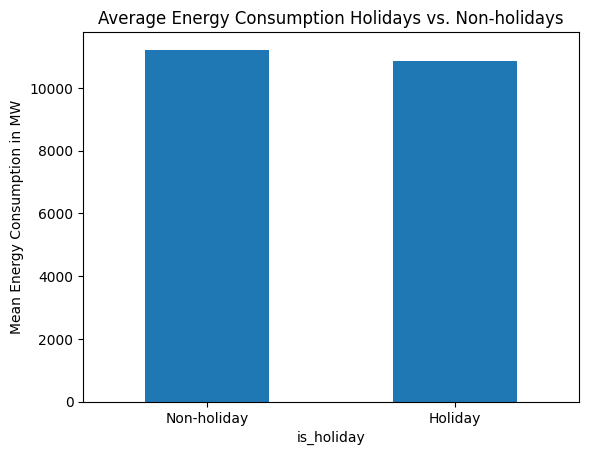

In [ ]:
import matplotlib.pyplot as plt

holiday_consumption.plot(kind="bar", title="Average Energy Consumption Holidays vs. Non-holidays")
plt.ylabel("Mean Energy Consumption in MW")
plt.xticks([0, 1], ["Non-holiday", "Holiday"], rotation=0)
plt.show()


### Findings on correlation between average use of energy on holiday days and non-holiday days
The correation is -0.01, and from the bar chart we find the average consumption of energy is actually less on holiday days. The low negative correlation shows that there's no significant linear correlation between holidays and energy consumption.

## Check specific holiday days (Thanksgiving and Christmas) and one week leading up to these holidays

Check if there's a correlationship between energy consumption one week leading up to the major holidays like Christmas and Thanksgiving, and on the day of these holidays

In [ ]:
def is_christmas(date):
    return date.month == 12 and date.day == 25

def is_thanksgiving(date):
    return date in us_holidays and us_holidays.get(date) == "Thanksgiving"

df_combined["is_christmas"] = df_combined["Datetime"].dt.date.apply(is_christmas)
df_combined["is_thanksgiving"] = df_combined["Datetime"].dt.date.apply(is_thanksgiving)

df_combined["is_week_before_christmas"] = df_combined["Datetime"].dt.date.apply(
    lambda x: (pd.Timestamp(year=x.year, month=12, day=18) <= pd.Timestamp(x) < pd.Timestamp(year=x.year, month=12, day=25))
)

df_combined["is_week_before_thanksgiving"] = df_combined["Datetime"].dt.date.apply(
    lambda x: (pd.Timestamp(x) - pd.DateOffset(weeks=1)).date() in us_holidays and us_holidays.get((pd.Timestamp(x) - pd.DateOffset(weeks=1)).date()) == "Thanksgiving"
)


In [ ]:
df_combined.head()

,Datetime,MW,company,is_holiday,is_christmas,is_thanksgiving,is_week_before_christmas,is_week_before_thanksgiving,Date
0,2004-12-31 01:00:00,13478.0,AEP_MW,True,False,False,False,False,2004-12-31
1,2004-12-31 02:00:00,12865.0,AEP_MW,True,False,False,False,False,2004-12-31
2,2004-12-31 03:00:00,12577.0,AEP_MW,True,False,False,False,False,2004-12-31
3,2004-12-31 04:00:00,12517.0,AEP_MW,True,False,False,False,False,2004-12-31
4,2004-12-31 05:00:00,12670.0,AEP_MW,True,False,False,False,False,2004-12-31


In [ ]:
#@title calculating correlation

christmas_corr = df_combined["is_christmas"].corr(df_combined["MW"])
thanksgiving_corr = df_combined["is_thanksgiving"].corr(df_combined["MW"])
week_before_christmas_corr = df_combined["is_week_before_christmas"].corr(df_combined["MW"])
week_before_thanksgiving_corr = df_combined["is_week_before_thanksgiving"].corr(df_combined["MW"])

print(f"Correlation on Christmas: {christmas_corr:.4f}")
print(f"Correlation on Thanksgiving: {thanksgiving_corr:.4f}")
print(f"Correlation 1 week before Christmas: {week_before_christmas_corr:.4f}")
print(f"Correlation 1 week before Thanksgiving: {week_before_thanksgiving_corr:.4f}")

Correlation on Christmas: -0.0044
Correlation on Thanksgiving: -0.0071
Correlation 1 week before Christmas: 0.0062
Correlation 1 week before Thanksgiving: 0.0012


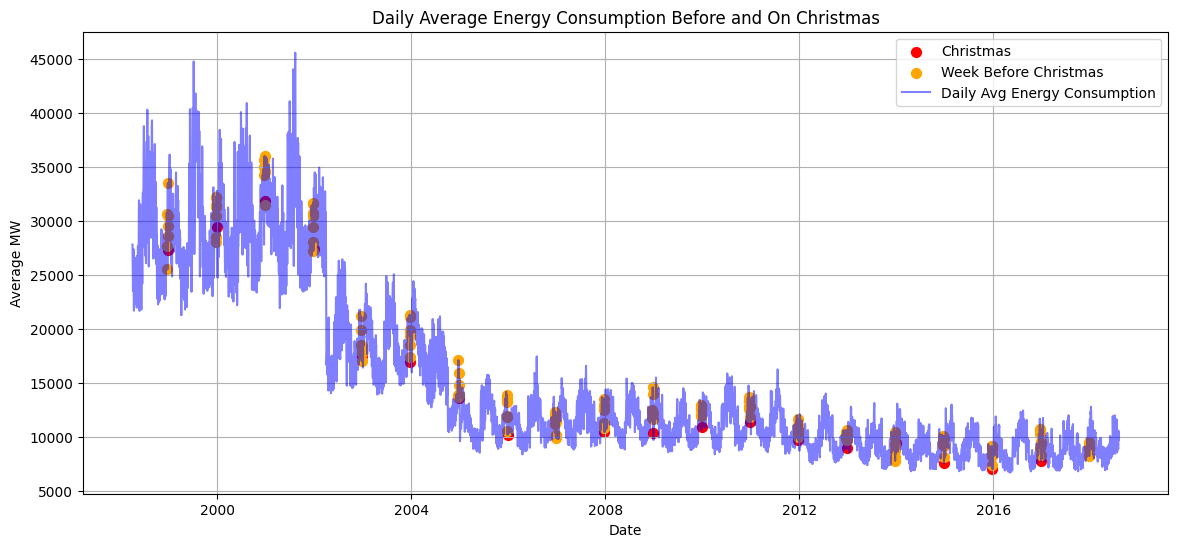

In [ ]:
#@title Visualization on average daily consumption of energy one week before Christmas and On Christmas
# aggregate data by daily mean instead of hourly
df_combined['Date'] = df_combined['Datetime'].dt.date
daily_consumption = df_combined.groupby('Date')['MW'].mean().reset_index()

# check energy consumption pattern a week before christmas and on christmas
daily_consumption['is_christmas'] = daily_consumption['Date'].apply(lambda x: is_christmas(pd.Timestamp(x)))
daily_consumption['is_week_before_christmas'] = daily_consumption['Date'].apply(
    lambda x: pd.Timestamp(x) >= pd.Timestamp(x.year, 12, 18) and pd.Timestamp(x) < pd.Timestamp(x.year, 12, 25)
)

plt.figure(figsize=(14, 6))
plt.scatter(daily_consumption[daily_consumption['is_christmas']]['Date'],
            daily_consumption[daily_consumption['is_christmas']]['MW'],
            color='red', label="Christmas", s=50)
plt.scatter(daily_consumption[daily_consumption['is_week_before_christmas']]['Date'],
            daily_consumption[daily_consumption['is_week_before_christmas']]['MW'],
            color='orange', label="Week Before Christmas", s=50)
plt.plot(daily_consumption['Date'], daily_consumption['MW'], label="Daily Avg Energy Consumption", color='blue',alpha=0.5)


plt.title("Daily Average Energy Consumption Before and On Christmas")
plt.xlabel("Date")
plt.ylabel("Average MW")
plt.legend()
plt.grid()
plt.show()


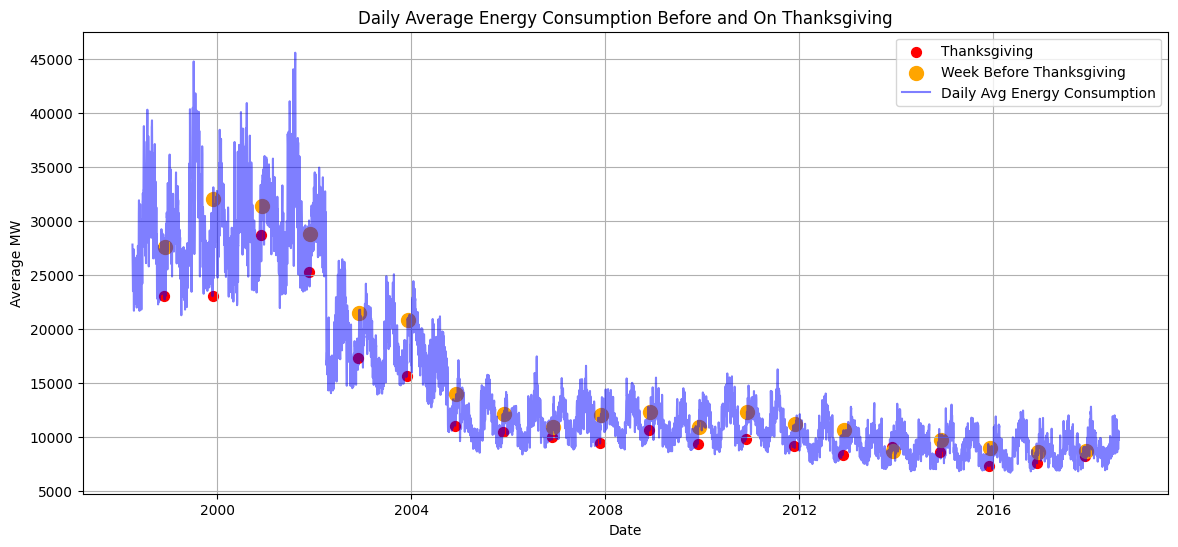

In [ ]:
#@title Visualization on daily average energy consumption one week before Thanksgiving and on Thanksgiving day
daily_consumption['is_thanksgiving'] = daily_consumption['Date'].apply(lambda x: is_thanksgiving(pd.Timestamp(x)))
daily_consumption['is_week_before_thanksgiving'] = daily_consumption['Date'].apply(
    lambda x: (pd.Timestamp(x) - pd.DateOffset(weeks=1)).date() in us_holidays and
              us_holidays.get((pd.Timestamp(x) - pd.DateOffset(weeks=1)).date()) == "Thanksgiving"
)

plt.figure(figsize=(14, 6))

plt.scatter(daily_consumption[daily_consumption['is_thanksgiving']]['Date'],
            daily_consumption[daily_consumption['is_thanksgiving']]['MW'],
            color='red', label="Thanksgiving", s=50)
plt.scatter(daily_consumption[daily_consumption['is_week_before_thanksgiving']]['Date'],
            daily_consumption[daily_consumption['is_week_before_thanksgiving']]['MW'],
            color='orange', label="Week Before Thanksgiving", s=100)

plt.plot(daily_consumption['Date'], daily_consumption['MW'], label="Daily Avg Energy Consumption", color='blue',alpha=0.5)

plt.title("Daily Average Energy Consumption Before and On Thanksgiving")
plt.xlabel("Date")
plt.ylabel("Average MW")
plt.legend()
plt.grid()
plt.show()


### Findings on correlation between major winter holidays
The correlation between holidays and a week leading up to holidays and average energy daily consumption seem very weak, suggesting there is no linear correlation.

## Check correlation between seasons and energy consumption
By Yian
<br>
Hypothesis: Different seasons could have different energy consumption needs

In [ ]:
#@title Categorize the seasons by month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    return None

daily_consumption['season'] = daily_consumption['Date'].apply(lambda x: get_season(pd.Timestamp(x)))



         Date            MW  is_christmas  is_week_before_christmas  season
0  1998-04-01  27813.739130         False                     False  Spring
1  1998-04-02  26605.791667         False                     False  Spring
2  1998-04-03  25672.333333         False                     False  Spring
3  1998-04-04  24487.083333         False                     False  Spring
4  1998-04-05  23487.565217         False                     False  Spring


In [ ]:
daily_consumption.head()

,Date,MW,is_christmas,is_week_before_christmas,season
0,1998-04-01,27813.739130,False,False,Spring
1,1998-04-02,26605.791667,False,False,Spring
2,1998-04-03,25672.333333,False,False,Spring
3,1998-04-04,24487.083333,False,False,Spring
4,1998-04-05,23487.565217,False,False,Spring


In [ ]:
seasonal_avg = daily_consumption.groupby('season')['MW'].mean().sort_index()

print(seasonal_avg)


season
Autumn    14252.616179
Spring    13895.398957
Summer    16808.728183
Winter    15965.795960
Name: MW, dtype: float64


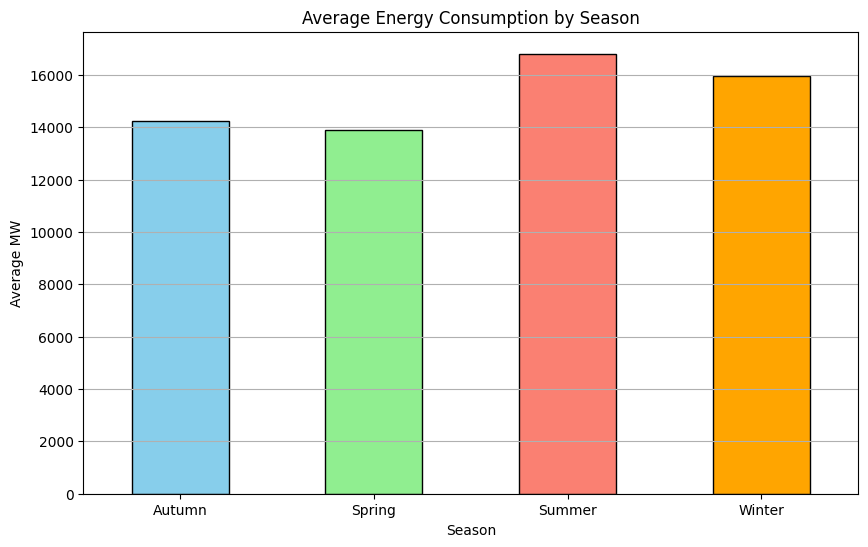

In [ ]:

plt.figure(figsize=(10, 6))
seasonal_avg.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'orange'], edgecolor='black')
plt.title("Average Energy Consumption by Season")
plt.xlabel("Season")
plt.ylabel("Average MW")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
daily_consumption['year'] = pd.to_datetime(daily_consumption['Date']).dt.year
seasonal_yearly_avg = daily_consumption.groupby(['year', 'season'])['MW'].mean().reset_index()

pivot_data = seasonal_yearly_avg.pivot(index='year', columns='season', values='MW')

plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', figsize=(16, 8), edgecolor='black')

plt.title("Average Energy Consumption by Season and Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average MW Energy Consumption", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Season")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

KeyboardInterrupt: 

## RNN Model

By Hogan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

                     hour  dayofweek  quarter  month  year  dayofyear  \
Datetime                                                                
2004-12-31 01:00:00     1          4        4     12  2004        366   
2004-12-31 02:00:00     2          4        4     12  2004        366   
2004-12-31 03:00:00     3          4        4     12  2004        366   
2004-12-31 04:00:00     4          4        4     12  2004        366   
2004-12-31 05:00:00     5          4        4     12  2004        366   
...                   ...        ...      ...    ...   ...        ...   
2018-01-01 20:00:00    20          0        1      1  2018          1   
2018-01-01 21:00:00    21          0        1      1  2018          1   
2018-01-01 22:00:00    22          0        1      1  2018          1   
2018-01-01 23:00:00    23          0        1      1  2018          1   
2018-01-02 00:00:00     0          1        1      1  2018          2   

                     dayofmonth   AEP_MW  
Datetim

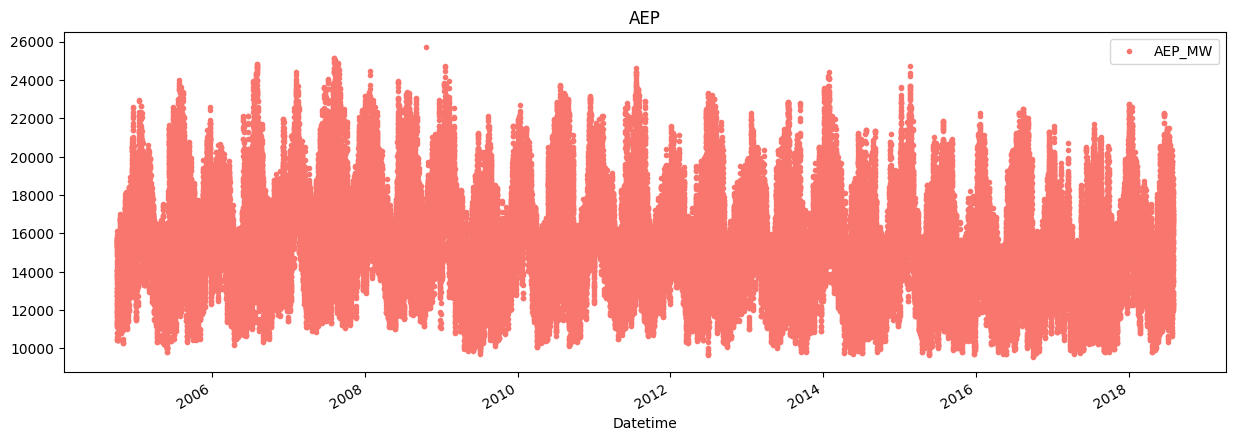

25695.0 9581.0


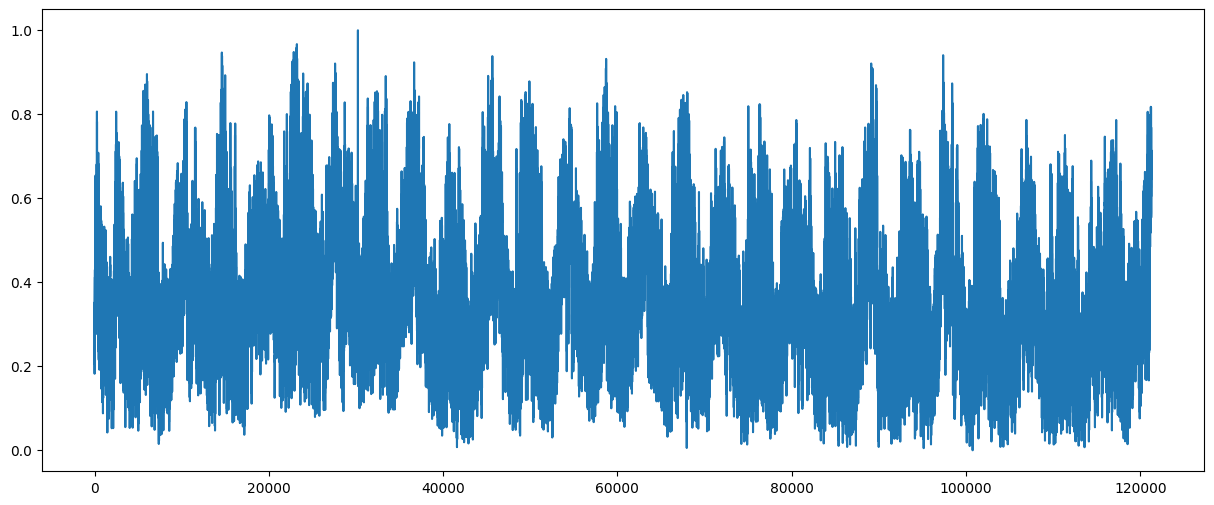

In [ ]:
#Plotting hourly energy usage:
AEP = pd.read_csv(os.path.join(path, "AEP_hourly.csv"), index_col=[0], parse_dates=[0])

mau = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
bieudo = AEP.plot(style='.',figsize=(15,5), color=mau[0], title='AEP')

#Data transformation
def create_features(df, label=None):
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day

    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year',
            'dayofyear', 'dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(AEP, label='AEP_MW')
features_and_target = pd.concat([X, y], axis=1)
print(features_and_target)
plt.show()

plt.figure(figsize=(15,6))
data_csv = AEP.dropna()
dataset = data_csv.values
dataset = dataset.astype('float32')
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: (x-min_value) / scalar, dataset))
plt.plot(dataset)
print(max_value, min_value)

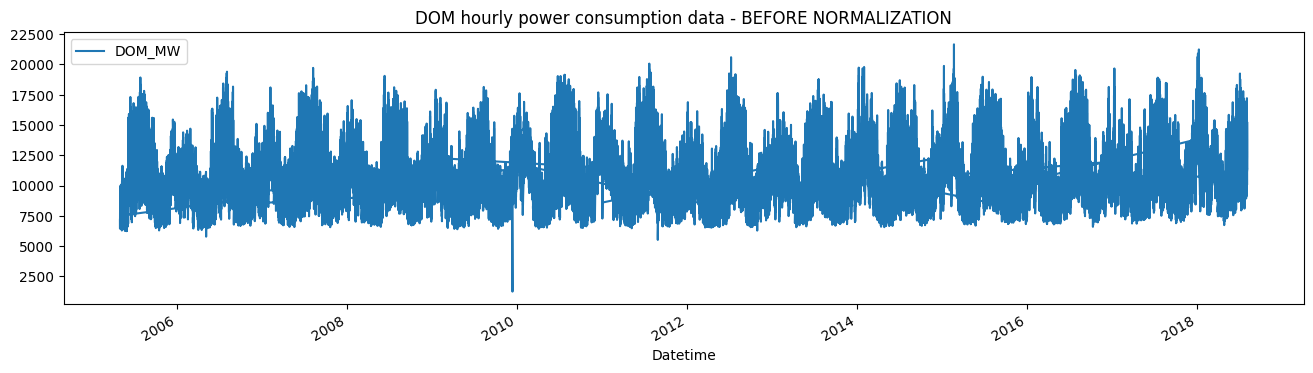

In [ ]:
#choosing DOM_hourly.csv data for analysis
fpath='./dataset/DOM_hourly.csv'

#Let's use datetime(2012-10-01 12:00:00,...) as index instead of numbers(0,1,...)
#This will be helpful for further data analysis as we are dealing with time series data
df = pd.read_csv(os.path.join(path, "DOM_hourly.csv"), index_col='Datetime', parse_dates=['Datetime'])
df.head()

#checking missing data
df.isna().sum()

#Data visualization

df.plot(figsize=(16,4),legend=True)

plt.title('DOM hourly power consumption data - BEFORE NORMALIZATION')

plt.show()

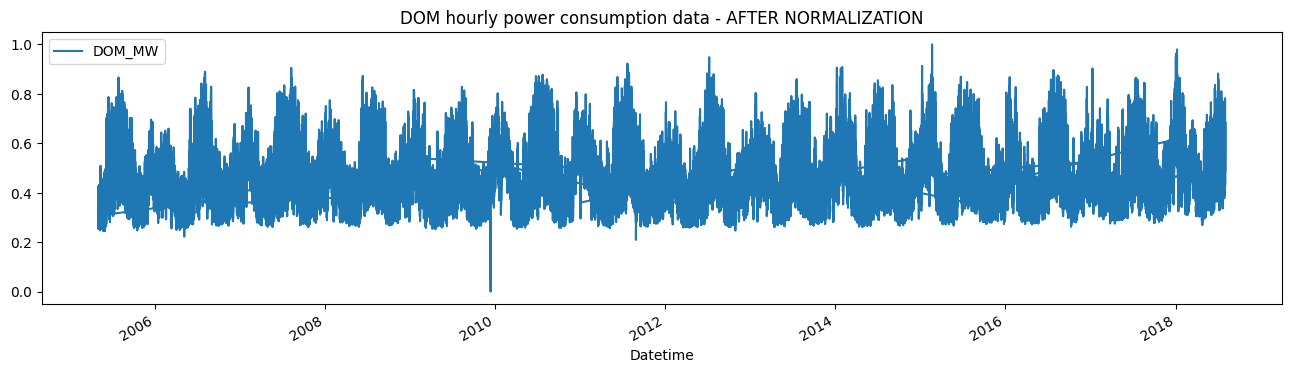

In [ ]:
#Normalize DOM hourly power consumption data

def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['DOM_MW']=scaler.fit_transform(df['DOM_MW'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape

#Visualize data after normalization

df_norm.plot(figsize=(16,4),legend=True)

plt.title('DOM hourly power consumption data - AFTER NORMALIZATION')

plt.show()

In [ ]:
# train data for deep learning models

def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i - seq_len: i, 0])
        y_train.append(stock.iloc[i, 0])

    # 1 last 6189 days are going to be used in test
    X_test = X_train[110000:]
    y_test = y_train[110000:]

    # 2 first 110000 days are going to be used in training
    X_train = X_train[:110000]
    y_train = y_train[:110000]

    # 3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # 4 reshape data to input into RNN models
    X_train = np.reshape(X_train, (110000, seq_len, 1))

    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

    return [X_train, y_train, X_test, y_test]

In [ ]:
#create train, test data
seq_len = 20 #choose sequence length

X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (110000, 20, 1)
y_train.shape =  (110000,)
X_test.shape =  (6169, 20, 1)
y_test.shape =  (6169,)


In [ ]:
#RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))
rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))
rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))
rnn_model.add(Dense(1))
rnn_model.summary()
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=1000)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 20, 40)              │           1,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 20, 40)              │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 40)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,201 (32.04 KB)

 Trainable params: 8,201 (32.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - loss: 0.1400
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 0.0195
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - loss: 0.0102
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 25s 147ms/step - loss: 0.0069
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - loss: 0.0051
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - loss: 0.0041
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0035
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - loss: 0.0030
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - loss: 0.0027
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 0.0024


In [ ]:
#r2 score for the values predicted by the above trained SIMPLE RNN model

rnn_predictions = rnn_model.predict(X_test)
rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
R2 Score of RNN model =  0.9503992389350308


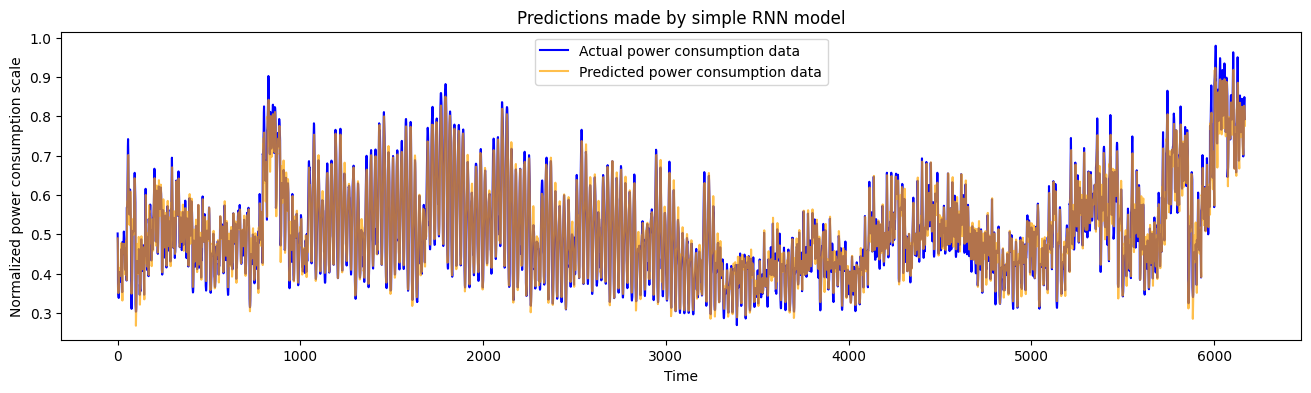

In [ ]:
# compare the actual values vs predicted values by plotting a graph

def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16, 4))
    plt.plot(test, color='blue', label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange', label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")

In [ ]:
#train model for LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))
lstm_model.add(Dense(1))
lstm_model.summary()
lstm_model.compile(optimizer="adam",loss="MSE")
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1000)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 40)              │           6,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 40)              │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 40)                  │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,681 (127.66 KB)

 Trainable params: 32,681 (127.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 236ms/step - loss: 0.0408
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 30s 271ms/step - loss: 0.0119
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - loss: 0.0095
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 39s 246ms/step - loss: 0.0052
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 27s 242ms/step - loss: 0.0041
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 42s 248ms/step - loss: 0.0032
Epoch 7/10
 10/110 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - loss: 0.0026

KeyboardInterrupt: 

In [ ]:
#r2 score for the values predicted by the above trained LSTM model
lstm_predictions = lstm_model.predict(X_test)
lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)

In [ ]:
#actual values vs predicted values by plotting a graph
plot_predictions(y_test, lstm_predictions, "Predictions made by LSTM model")

In [ ]:
#RNN, LSTM model by plotting data in a single graph
plt.figure(figsize=(15,8))
plt.plot(y_test, c="orange", linewidth=3, label="Original values")
plt.plot(lstm_predictions, c="red", linewidth=3, label="LSTM predictions")
plt.plot(rnn_predictions, alpha=0.5, c="blue", linewidth=3, label="RNN predictions")
plt.legend()
plt.title("Predictions vs actual data", fontsize=20)
plt.show()